In [1]:
import pandas as pd
df = pd.read_csv('green_tripdata_2015-09__cleaned.csv')

In [2]:
# 4. Tip Percentage

In [3]:
df['tip_percent'] = df['Tip_amount'] / (df['Total_amount']) * 100

In [4]:
df.Payment_type.groupby(df['Payment_type']).count()

Payment_type
1    685131
2    755750
3      2446
4      2914
5        48
Name: Payment_type, dtype: int64

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import math

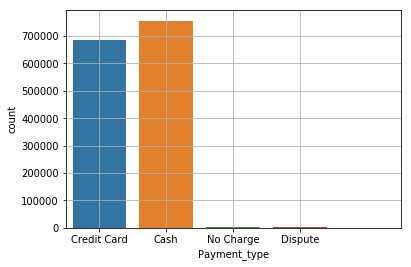

In [6]:
sns.countplot(x = 'Payment_type', data = df)
plt.grid()
plt.xticks([0,1,2,3], ['Credit Card', 'Cash', 'No Charge', 'Dispute'])
plt.show()

In [7]:
df[~(df.Payment_type == 1)].shape[0] / df.shape[0]

0.5262834744646471

In [8]:
df = df[(df.Payment_type == 1)]

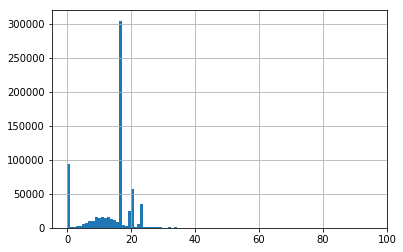

In [9]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [10]:
q95 = np.percentile(df.tip_percent, 99.9)
q95
df = df[df.tip_percent < q95]

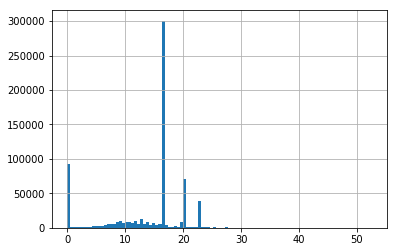

In [11]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [12]:
df['Tipped'] = 0
df['Tipped'][df.tip_percent > 0] = 1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df.Tipped.groupby(df.Tipped).count()

Tipped
0     91136
1    593309
Name: Tipped, dtype: int64

In [14]:
df.drop('Lpep_pickup_datetime', axis=1, inplace=True)
df.drop('Lpep_dropoff_datetime', axis=1, inplace=True)
df.drop('Pickup_longitude', axis=1, inplace=True)
df.drop('Pickup_latitude', axis=1, inplace=True)
df.drop('Dropoff_longitude', axis=1, inplace=True)
df.drop('Dropoff_latitude', axis=1, inplace=True)

In [15]:
df['VendorID'] = df['VendorID'].astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].astype('category')
df['RateCodeID'] = df['RateCodeID'].astype('category')
df['Payment_type'] = df['Payment_type'].astype('category')
df['Trip_type'] = df['Trip_type'].astype('int').astype('category')
df['Airport'] = df['Airport'].astype('category')

df['Pickup_loc'] = df['Pickup_loc'].astype('category')
df['Dropoff_loc'] = df['Dropoff_loc'].astype('category')

In [16]:
df['VendorID'] = df['VendorID'].cat.codes.astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].cat.codes.astype('category')
df['RateCodeID'] = df['RateCodeID'].cat.codes.astype('category')
df['Payment_type'] = df['Payment_type'].cat.codes.astype('category')
df['Trip_type'] = df['Trip_type'].cat.codes.astype('int').astype('category')
df['Airport'] = df['Airport'].cat.codes.astype('category')

df["Pickup_loc"] = df["Pickup_loc"].cat.codes.astype('category')
df["Dropoff_loc"] = df["Dropoff_loc"].cat.codes.astype('category')

In [17]:
from sklearn.model_selection import train_test_split

X = df[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport'
        , 'Pickup_loc', 'Dropoff_loc'
       ]]
y = df['tip_percent']
yc = df.Tipped

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [21]:
# Test options and evaluation metric
seed = 7
scoring = 'mean_square_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
# models.append(('GNB', GaussianNB()))
models.append(('NN', MLPRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.077292 (0.002469)
RF: 0.876414 (0.002598)
GB: 0.574528 (0.002093)
CART: 0.775568 (0.004602)
KNN: 0.227211 (0.004480)
NN: 0.672906 (0.030356)


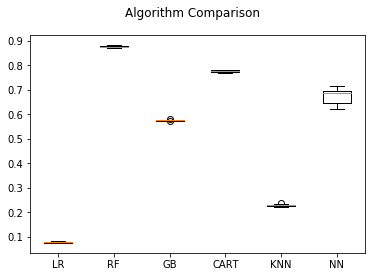

In [22]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
parameter_candidates = [
  {'n_estimators': [1, 10]},
]

In [25]:
clf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameter_candidates, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [26]:
print('Best score:', clf.best_score_) 

print('Best parameters:',clf.best_params_) 

Best score: 0.874118782072665
Best parameters: {'n_estimators': 10}


In [27]:
m = RandomForestRegressor()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.9780604672255035

In [28]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

5.893486492372171 0.8788518565853837


In [29]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

,pred,test
0,4.216867,0.000000
1,16.599859,16.666667
2,16.587678,16.587678
3,14.634151,16.949153
4,0.000000,0.000000
5,16.573757,16.640254
6,0.000000,0.000000
7,7.273619,7.246377
8,16.666667,16.666667
9,16.267643,16.646989


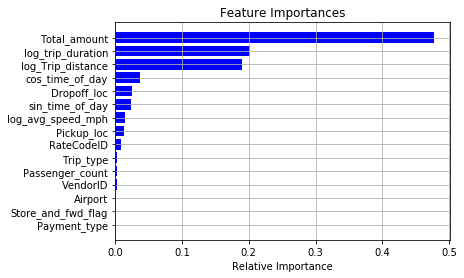

In [30]:
features = X.columns
importances = m.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.3)

In [32]:
# Test options and evaluation metric
seed = 7
scoring = 'mean_square_error'

# Spot Check Algorithms
models = []
# models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestClassifier()))
# models.append(('GB', GradientBoostingRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVM', SVR()))
# models.append(('NN', MLPRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.945962 (0.001995)


In [33]:
m = RandomForestClassifier()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.9982258808501578

In [34]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

0.053970603991545484 0.9460293960084545


In [35]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

,pred,test
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [36]:
X = X[yc == 1]
y = y[yc == 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
m = RandomForestRegressor()
m.fit(X_train, y_train)
m.score(X_train, y_train) 

0.96323289416599

In [38]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

4.155726008288175 0.801213954513034


In [39]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

,pred,test
0,19.620070,20.050761
1,16.666667,16.666667
2,16.666667,16.666667
3,16.577540,16.577540
4,16.666667,16.666667
5,16.657143,16.666667
6,16.666667,16.666667
7,11.744289,8.928571
8,19.975933,19.975933
9,16.666667,16.666667


In [40]:
df_1 = df[df.Tipped == 1].sample(len(df[df.Tipped == 0]), replace=False)

df_bal = pd.concat([df_1, df[df.Tipped == 0]])

In [41]:
df_bal.Tipped.groupby(df_bal.Tipped).count()

Tipped
0    91136
1    91136
Name: Tipped, dtype: int64

In [42]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_Trip_distance_norm', 'trip_duration', 'log_trip_duration',
       'log_trip_duration_norm', 'avg_speed_mph', 'log_avg_speed_mph',
       'log_avg_speed_mph_norm', 'time_of_day', 'time_of_day_hour',
       'time_of_day_hour_sec', 'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc', 'tip_percent', 'Tipped'],
      dtype='object')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_bal = df_bal[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc']]
y_bal = df_bal['Tipped']

In [44]:
m = LogisticRegression()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.6510105775983146

In [45]:
m = RandomForestClassifier()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.9962254213483146

In [46]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split

In [47]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.3)

In [48]:
# Test options and evaluation metric
seed = 7

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('NN', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_bal, y_bal, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.472701 (0.087562)
RF: 0.892842 (0.035660)
GB: 0.877606 (0.007303)
CART: 0.927120 (0.002262)
KNN: 0.691966 (0.019165)
GNB: 0.500555 (0.431181)
NN: 0.779812 (0.189521)


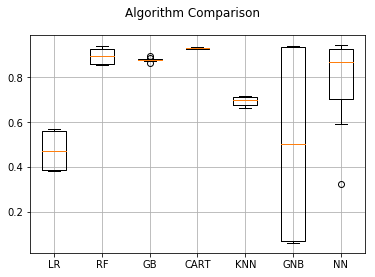

In [51]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [57]:
m = LogisticRegression()

m.fit(X_bal_train, y_bal_train)

y_pred = y_bal_test.copy()
y_pred[y_pred == y_pred] = 0

y_pred[m.predict_proba(X_bal_test)[:, 1] > 0.8] = 1

confusion_matrix(y_bal_test, y_pred)

print(classification_report(y_bal_test, y_pred))

             precision    recall  f1-score   support

          0       0.51      0.97      0.67     27413
          1       0.70      0.06      0.12     27269

avg / total       0.61      0.52      0.39     54682



In [58]:
m

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

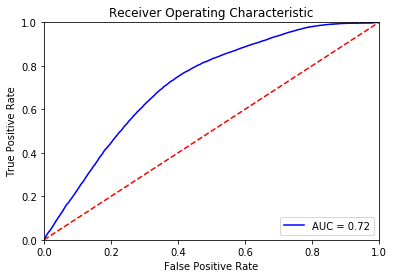

In [61]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = m.predict_proba(X_bal_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_bal_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
y_pred = [df.tip_percent.mean()] * len(y_test)

mean_squared_error(y_test, y_pred)
# r2_score(y_test, y_pred)

25.634544401720888

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

0.0916980857157903 18.98852547381815


In [65]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

0.8017857533351302 4.143772255545255


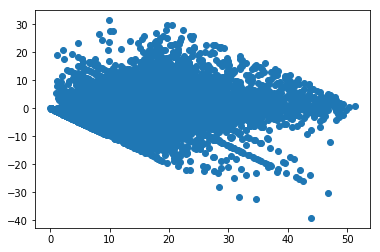

In [66]:
y_res = y_test - y_pred

plt.scatter(y_pred, y_res)

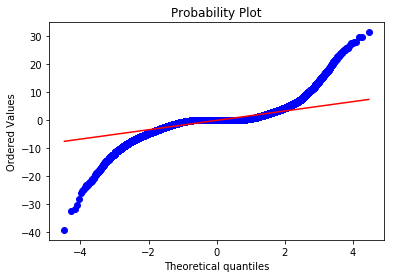

In [67]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 0, scale = 5, size=100)   
stats.probplot(y_res, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = df.tip_percent,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
model.predict( X.iloc[800].reshape(1, -1) )

In [ ]:
y.iloc[800]

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

feature_importances

In [ ]:
df.tip_percent.mean()

In [ ]:
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)

m = sm.OLS(y_train, X2_train).fit()

m.summary()

In [ ]:
plt.scatter(m.predict(X2_train), m.resid, s=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.coef_

In [ ]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=10)

scores.mean()